In [2]:
from climakitae.core.data_interface import (
    get_data_options, 
    get_subsetting_options, 
    get_data
)
# import climakitae as ck

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.backends.backend_pdf import PdfPages
import time
from pyproj import Transformer
import geopandas as gpd
from shapely.geometry import Point
import contextily as cx
import climakitaegui as ckg

print('done')

done


In [5]:
# Define the sets of variables
variables_units_list = [
    ("Maximum air temperature at 2m", "degF","Statistical","daily",[0.8,1.0]),
]

# Initialize dataset variables
stat_ds = None

# Loop through each set of variables and process them
for variables_units in variables_units_list:
    variable, unit, downscale, timescale, GWL = variables_units
    print(variable, unit, downscale, timescale, GWL)
    print(f"Processing variable: {variable}")
    start_time = time.time()
    stat_ds = get_data(
        variable=variable,
        units=unit,
        downscaling_method=downscale,
        resolution="3 km",
        timescale=timescale,
        cached_area="Southern California Edison",
        approach="Warming Level",
        warming_level_window=15,
        warming_level=GWL
    )
    print(f"data retreived in {time.time() - start_time:.2f} seconds.")

print(stat_ds)


variables_units_list = [
    ("Maximum air temperature at 2m", "degF","Dynamical","daily",[0.8,1.0]),
]
# Initialize dataset variables
dyn_ds = None

# Loop through each set of variables and process them
for variables_units in variables_units_list:
    variable, unit, downscale, timescale, GWL = variables_units
    print(variable, unit, downscale, timescale, GWL)
    print(f"Processing variable: {variable}")
    start_time = time.time()
    dyn_ds = get_data(
        variable=variable,
        units=unit,
        downscaling_method=downscale,
        resolution="3 km",
        timescale=timescale,
        cached_area="Southern California Edison",
        approach="Warming Level",
        warming_level_window=15,
        warming_level=GWL
    )


print(dyn_ds)



Maximum air temperature at 2m degF Dynamical daily [0.8, 1.0]
Processing variable: Maximum air temperature at 2m
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!! Returned data array is huge. Operations could take 10x to infinity longer than 1GB of data !!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

WARNING FOR WARMING LEVELS APPROACH
-----------------------------------
There may be NaNs in your data for certain simulation/warming level combinations if the warming level is not reached for that particular simulation before the year 2100. 

This does not mean you have missing data, but rather a feature of how the data is combined in retrieval to return a single data object. 

If you want to remove these empty simulations, it is recommended to first subset the data object by each individual warming level and then dropping NaN values.
<xarray.DataArray np.str_('Maximum air temperat

In [8]:
print(dynamical_downscaling_years.values)

[2005 2006 2003 1978 1998 2012 1996 2011]


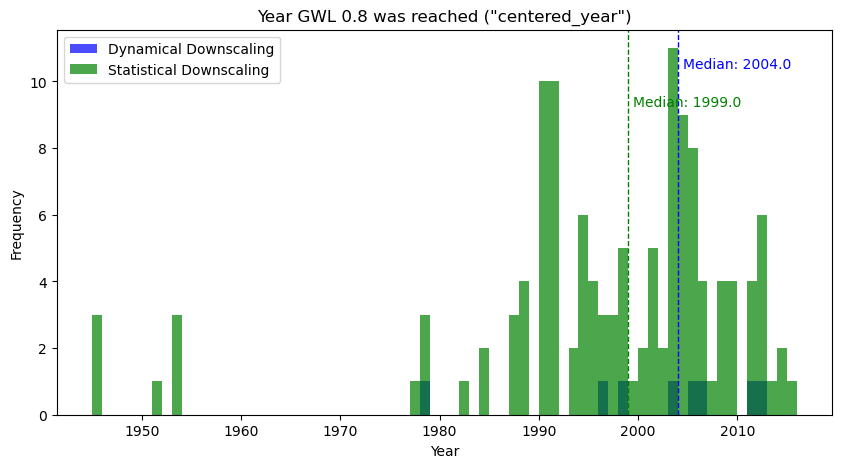

In [17]:

# Sample data for the two arrays of years
dynamical_downscaling_years = dyn_ds.sel(warming_level=0.8).centered_year.values
statistical_downscaling_years = stat_ds.sel(warming_level=0.8).centered_year.values

# Calculate the median of the years in each array
median_dynamical = np.median(dynamical_downscaling_years)
median_statistical = np.median(statistical_downscaling_years)

# Create the overlaid histogram plot
plt.figure(figsize=(10, 5))
plt.hist(dynamical_downscaling_years, bins=range(min(dynamical_downscaling_years), max(dynamical_downscaling_years) + 2), alpha=0.7, label='Dynamical Downscaling', color='blue')
plt.hist(statistical_downscaling_years, bins=range(min(statistical_downscaling_years), max(statistical_downscaling_years) + 2), alpha=0.7, label='Statistical Downscaling', color='green')
plt.axvline(median_dynamical, color='blue', linestyle='dashed', linewidth=1)
plt.text(median_dynamical + 0.5, plt.ylim()[1] * 0.9, f'Median: {median_dynamical}', color='blue')
plt.axvline(median_statistical, color='green', linestyle='dashed', linewidth=1)
plt.text(median_statistical + 0.5, plt.ylim()[1] * 0.8, f'Median: {median_statistical}', color='green')
plt.title('Year GWL 0.8 was reached ("centered_year")')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()
plt.show()


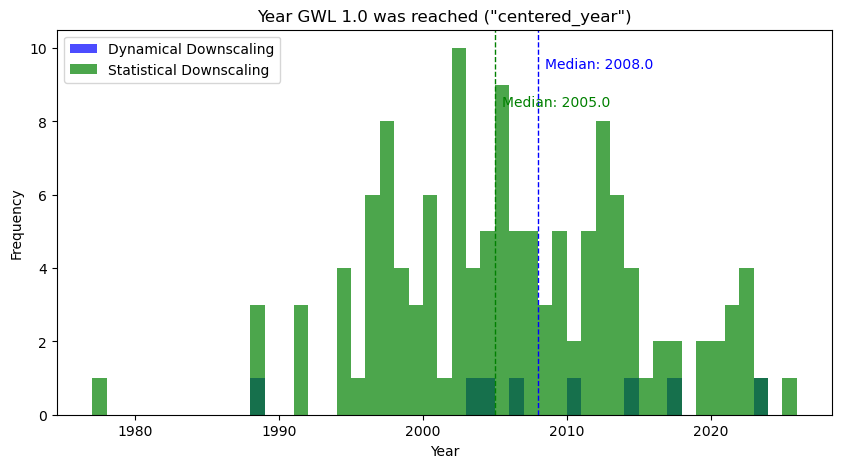

In [16]:


# Sample data for the two arrays of years
dynamical_downscaling_years = dyn_ds.sel(warming_level=1.0).centered_year.values
statistical_downscaling_years = stat_ds.sel(warming_level=1.0).centered_year.values

# Calculate the median of the years in each array
median_dynamical = np.median(dynamical_downscaling_years)
median_statistical = np.median(statistical_downscaling_years)

# Create the overlaid histogram plot
plt.figure(figsize=(10, 5))
plt.hist(dynamical_downscaling_years, bins=range(min(dynamical_downscaling_years), max(dynamical_downscaling_years) + 2), alpha=0.7, label='Dynamical Downscaling', color='blue')
plt.hist(statistical_downscaling_years, bins=range(min(statistical_downscaling_years), max(statistical_downscaling_years) + 2), alpha=0.7, label='Statistical Downscaling', color='green')
plt.axvline(median_dynamical, color='blue', linestyle='dashed', linewidth=1)
plt.text(median_dynamical + 0.5, plt.ylim()[1] * 0.9, f'Median: {median_dynamical}', color='blue')
plt.axvline(median_statistical, color='green', linestyle='dashed', linewidth=1)
plt.text(median_statistical + 0.5, plt.ylim()[1] * 0.8, f'Median: {median_statistical}', color='green')
plt.title('Year GWL 1.0 was reached ("centered_year")')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()
plt.show()
